In [1]:
library(MatchIt)
library(survival)
library(survminer)
library(tidyr)
library(tableone)
library(TriMatch)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma


Loading required package: scales

Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: ez



In [2]:
df_psm <- read.csv("df_diuretic_responsitive.csv",as.is = TRUE)
df_psm <- as.data.frame(df_psm)
df_psm$group_creteria <- df_psm[ , "label_diu_res"]
df_psm$group_creteria <- as.factor(df_psm$group_creteria)

# PSM

In [3]:
match_var1 <- c('creatinine', 'urineoutput','sofa_norenal',"colloid_bolus" )  
match_var2 <- c('creatinine', 'urineoutput','sofa_norenal',"colloid_bolus" )  
match_var3 <- c('creatinine', 'urineoutput','sofa_norenal',"colloid_bolus" )  

# match_var1 <- c("colloid_bolus",'urineoutput','creatinine','sofa_norenal','weight','age','gender','aniongap','temperature','ptt','glucose','ph','heart_rate','resp_rate','rdw') # "Congestive_heart_failure"
# match_var2 <- c("colloid_bolus",'urineoutput','creatinine','sofa_norenal','weight','age','gender','aniongap','temperature','ptt','glucose','ph','heart_rate','resp_rate','rdw') # "Congestive_heart_failure"
# match_var3 <- c("colloid_bolus",'urineoutput','creatinine','sofa_norenal','weight','age','gender','aniongap','temperature','ptt','glucose','ph','heart_rate','resp_rate','rdw') # "Congestive_heart_failure"

print(table(df_psm$group_creteria))
df <- df_psm


   No diuretic Non-responsive     responsive 
          1770            510           2433 


In [4]:
# M2 corresponds to the number of times a treat1 unit can be matched with a treat2 unit.
# The M1 parameter corresponds to the number of times a treat1 unit can be used in total.

df_ <- df[df$groupHPD==1,]
print(table(df_$group_creteria))
#formu <- ~ creatinine + urineoutput + sofa_norenal + colloid_bolus  
formu <- paste(match_var1, collapse = " + ")
formu <- paste("~", formu)

df_.tpsa <- trips(df_, df_$group_creteria, as.formula(formu))
df_.matched.1to1 <- trimatch(df_.tpsa,caliper=0.05 )
#df_.matched.1to1 <- trimatch(df_.tpsa,caliper=0.1 )
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,1]),]
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,2]),]                                    
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,3]),]
df_merge <- cbind(df_,df_.tpsa$id)
matched_id <- c(df_.matched.1to1[, 1],df_.matched.1to1[,2],df_.matched.1to1[,3])
df_match <- df_merge[df_merge$`df_.tpsa$id` %in% matched_id, ]
print(table(df_match$label))
table1 <- CreateTableOne(vars = match_var1, data = df_match, strata = "group_creteria")  
tab1_csv <- print(table1)
df_match1 <- df_match
#multibalance.plot(df_.tpsa)


   No diuretic Non-responsive     responsive 
           396            184            718 


Using logistic regression to estimate propensity scores...




   No diuretic Non-responsive     responsive 
           278            149            209 
                           Stratified by group_creteria
                            No diuretic       Non-responsive   
  n                             278               149          
  creatinine (mean (SD))       1.13 (0.32)       1.16 (0.30)   
  urineoutput (mean (SD))   1095.86 (549.06)  1186.56 (602.85) 
  sofa_norenal (mean (SD))     5.16 (2.48)       5.32 (2.49)   
  colloid_bolus (mean (SD)) 1611.35 (1427.99) 1529.13 (1385.51)
                           Stratified by group_creteria
                            responsive        p      test
  n                             209                      
  creatinine (mean (SD))       1.13 (0.34)     0.540     
  urineoutput (mean (SD))   1138.57 (500.99)   0.257     
  sofa_norenal (mean (SD))     5.55 (2.80)     0.263     
  colloid_bolus (mean (SD)) 1865.57 (2144.58)  0.125     


In [5]:
df_ <- df[df$groupHPD==2,]
print(table(df_$group_creteria))

formu <- paste(match_var2, collapse = " + ")
formu <- paste("~", formu)
df_.tpsa <- trips(df_, df_$group_creteria, as.formula(formu))

df_.matched.1to1 <- trimatch(df_.tpsa,method=OneToN, M1=1.5, M2=4)
# df_.matched.1to1 <- trimatch(df_.tpsa,caliper=0.015)# 0.015

df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,1]),]
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,2]),]
df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,3]),]
df_merge <- cbind(df_,df_.tpsa$id)
matched_id <- c(df_.matched.1to1[, 1],df_.matched.1to1[,2],df_.matched.1to1[,3])
df_match <- df_merge[df_merge$`df_.tpsa$id` %in% matched_id, ]
print(table(df_match$label))
table2 <- CreateTableOne(vars = match_var2, data = df_match, strata = "group_creteria")  
tab2_csv <- print(table2)
df_match2 <- df_match
#multibalance.plot(df_.tpsa)


   No diuretic Non-responsive     responsive 
          1211            211           1633 


Using logistic regression to estimate propensity scores...




   No diuretic Non-responsive     responsive 
           370            196            370 
                           Stratified by group_creteria
                            No diuretic       Non-responsive   
  n                             370               196          
  creatinine (mean (SD))       0.82 (0.24)       0.83 (0.20)   
  urineoutput (mean (SD))   1275.64 (656.41)  1330.77 (659.04) 
  sofa_norenal (mean (SD))     4.33 (2.05)       4.24 (2.08)   
  colloid_bolus (mean (SD)) 1381.67 (1330.95) 1280.82 (1199.31)
                           Stratified by group_creteria
                            responsive        p      test
  n                             370                      
  creatinine (mean (SD))       0.84 (0.21)     0.767     
  urineoutput (mean (SD))   1289.22 (618.56)   0.619     
  sofa_norenal (mean (SD))     4.32 (1.83)     0.878     
  colloid_bolus (mean (SD)) 1516.26 (1382.18)  0.111     


In [6]:
df_ <- df[df$groupHPD==3,]
print(table(df_$group_creteria))

formu <- paste(match_var3, collapse = " + ")
formu <- paste("~", formu)
df_.tpsa <- trips(df_, df_$group_creteria, as.formula(formu))

#df_.matched.1to1 <- trimatch(df_.tpsa, caliper=0.07) 
df_.matched.1to1 <- trimatch(df_.tpsa, caliper=0.14) 
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,1]),]
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,2]),]
# df_.matched.1to1 <- df_.matched.1to1[!duplicated(df_.matched.1to1[,3]),]
df_merge <- cbind(df_,df_.tpsa$id)
matched_id <- c(df_.matched.1to1[, 1],df_.matched.1to1[,2],df_.matched.1to1[,3])
df_match <- df_merge[df_merge$`df_.tpsa$id` %in% matched_id, ]
print(table(df_match$label))
table3 <- CreateTableOne(vars = match_var3, data = df_match, strata = "group_creteria")  
tab3_csv <- print(table3)
df_match3 <- df_match
#multibalance.plot(df_.tpsa)


   No diuretic Non-responsive     responsive 
           163            115             82 


Using logistic regression to estimate propensity scores...




   No diuretic Non-responsive     responsive 
            74             98             65 
                           Stratified by group_creteria
                            No diuretic       Non-responsive   
  n                              74                98          
  creatinine (mean (SD))       1.47 (0.57)       1.43 (0.45)   
  urineoutput (mean (SD))    742.22 (747.38)   813.02 (657.53) 
  sofa_norenal (mean (SD))     7.19 (2.97)       6.91 (2.86)   
  colloid_bolus (mean (SD)) 3403.30 (2558.17) 2938.50 (2218.65)
                           Stratified by group_creteria
                            responsive        p      test
  n                              65                      
  creatinine (mean (SD))       1.39 (0.57)     0.640     
  urineoutput (mean (SD))   1022.12 (697.13)   0.052     
  sofa_norenal (mean (SD))     6.76 (2.53)     0.652     
  colloid_bolus (mean (SD)) 2837.43 (2508.51)  0.317     


In [7]:
df_match <- rbind(df_match1,df_match2,df_match3)
# matched_id <- c(df_match$stay_id)
# df_match_add <- df_psm[df_psm$stay_id %in% matched_id, ]
write.csv(df_match, file = "df_diuretic_responsitive_match.csv", row.names = FALSE)

In [8]:
tab1_csv1 <- cbind(tab1_csv, rep("C1", nrow(tab1_csv)))
tab2_csv1 <- cbind(tab2_csv, rep("C2", nrow(tab2_csv)))
tab3_csv1 <- cbind(tab3_csv, rep("C3", nrow(tab3_csv)))
tab_combind <- rbind(tab1_csv1,tab2_csv1,tab3_csv1)
colnames(tab_combind) <- c("features",'No diuretic','Non-responsive','responsive',"p-value","subphenotypes")
write.csv(tab_combind, file = "mimic_3psm_macth.csv")
tab_combind

,features,No diuretic,Non-responsive,responsive,p-value,subphenotypes
n,278,149,209,,,C1
creatinine (mean (SD)),1.13 (0.32),1.16 (0.30),1.13 (0.34),0.540,,C1
urineoutput (mean (SD)),1095.86 (549.06),1186.56 (602.85),1138.57 (500.99),0.257,,C1
sofa_norenal (mean (SD)),5.16 (2.48),5.32 (2.49),5.55 (2.80),0.263,,C1
colloid_bolus (mean (SD)),1611.35 (1427.99),1529.13 (1385.51),1865.57 (2144.58),0.125,,C1
n,370,196,370,,,C2
creatinine (mean (SD)),0.82 (0.24),0.83 (0.20),0.84 (0.21),0.767,,C2
urineoutput (mean (SD)),1275.64 (656.41),1330.77 (659.04),1289.22 (618.56),0.619,,C2
sofa_norenal (mean (SD)),4.33 (2.05),4.24 (2.08),4.32 (1.83),0.878,,C2
colloid_bolus (mean (SD)),1381.67 (1330.95),1280.82 (1199.31),1516.26 (1382.18),0.111,,C2


# survival

In [9]:
# df_match = read.csv("df_diuretic_responsitive.csv",as.is = TRUE)
# df_match <- as.data.frame(df_match)
# df_match$group_creteria <- df_match[ , "label_diu_res"]
# df_match$group_creteria <- as.factor(df_match$group_creteria)

In [10]:
df_survival =  df_match[,c("survival_28day","mortality_28d", "groupHPD","group_creteria")]

In [11]:
survival_curve <- function(data,title,survival_day,expire_flag){
    df_select <- data
    fit <- survfit(Surv(survival_day,expire_flag) ~ label, data = df_select)
    ggsurvplot(fit, data = df_select,
               surv.median.line = hv,  # 增加中位生存时间,
               conf.int = TRUE, # 增加置信区间,
              # risk.table = TRUE, # 绘制累计风险曲线,
#               title=title,,
               pval = TRUE,
               #add.all = TRUE, # 添加总患者生存曲线,
               xlab = "Follow up time (days)",
               legend = c(0.2,0.2)) # 指定图例位置,
}


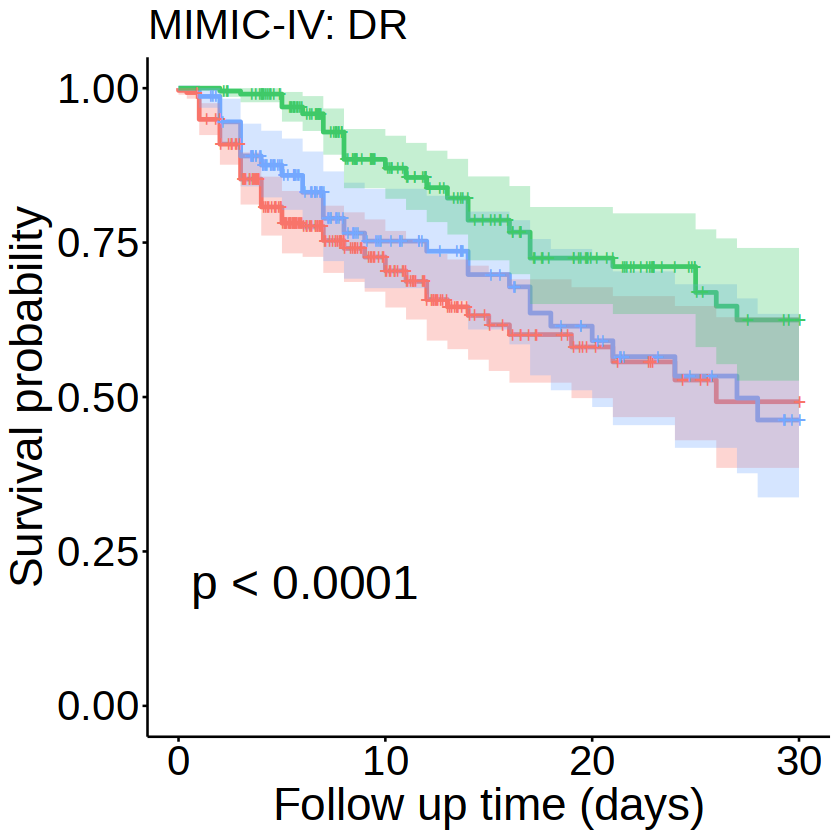

In [12]:
# pdf("MIMIC_C1_28d_mortality.pdf")
# png("MIMIC_C1_28d_mortality.png")

df_select <- df_survival[df_survival$groupHPD==1,]
#df_select = df_select[df_select$group_creteria!="responsive",] #No diuretic

fit <- survfit(Surv(survival_28day,mortality_28d) ~ group_creteria, data = df_select)
ggsurv <- ggsurvplot(fit, data = df_select, 
#                surv.median.line = "hv",  # 增加中位生存时间,
               conf.int = TRUE, # 增加置信区间,
#               risk.table = TRUE, # 绘制累计风险曲线,
               title="MIMIC-IV: DR",
               pval = TRUE,pval.size = 10,
               #add.all = TRUE, # 添加总患者生存曲线,
               xlab = "Follow up time (days)",
               palette = c("#f8746a" ,"#74a8ff","#3fc968"),
               legend = "none",#legend = c(0.8,0.2),legend.title = "",legend.labs = c("No diuretic", "Non-Responsive","Responsive"),
                font.main = 25,     #标题字体大小
               font.x = 27,        #x坐标字体大小
               font.y = 27,        #y坐标字体大小
               font.tickslab = 16,
               risk.table.fontsize = 16,
tables.theme = theme_cleantable()+ theme( ))

ggsurv$plot <- ggsurv$plot +
  theme(legend.text = element_text(size = 16),axis.text.y = element_text(size = 25), axis.text.x = element_text(size = 25))  # 调整图例文本的字体大小为16
ggsurv$table <- ggsurv$table +
  theme(plot.title = element_text(size = 20, color = "black", face = "bold"))
ggsurv
# dev.off()

In [17]:
pdf("MIMIC_C2_28d_mortality.pdf")
# png("MIMIC_C2_28d_mortality.png")

df_select <- df_survival[df_survival$groupHPD==2,]
#df_select = df_select[df_select$group_creteria!="No diuretic",]
print(summary(df_select$group_creteria))

fit <- survfit(Surv(survival_28day,mortality_28d) ~ group_creteria, data = df_select)

ggsurv <- ggsurvplot(fit, data = df_select, 
#                surv.median.line = "hv",  # 增加中位生存时间,
               conf.int = TRUE, # 增加置信区间,
#               risk.table = TRUE, # 绘制累计风险曲线,
               title="MIMIC-IV: RR",
               pval = TRUE,pval.size = 10,
               #add.all = TRUE, # 添加总患者生存曲线,
               xlab = "Follow up time (days)",
               palette = c("#f8746a" ,"#74a8ff","#3fc968"),
               legend = "none",#legend = c(0.8,0.2),legend.title = "",legend.labs = c("No diuretic", "Non-Responsive","Responsive"), # 指定图例位置
                font.main = 25,     #标题字体大小
               font.x = 27,        #x坐标字体大小
               font.y = 27,        #y坐标字体大小
               font.tickslab = 16,
               risk.table.fontsize = 6,tables.theme = theme_cleantable()+ 
    theme(axis.text.y = element_text(size = 16))) # 指定图例位置
ggsurv$plot <- ggsurv$plot +
  theme(legend.text = element_text(size = 16),axis.text.y = element_text(size = 25), axis.text.x = element_text(size = 25))  # 调整图例文本的字体大小为16
ggsurv$table <- ggsurv$table +
  theme(plot.title = element_text(size = 20, color = "black", face = "bold"))
ggsurv
dev.off()

   No diuretic Non-responsive     responsive 
           370            196            370 


png 
  2

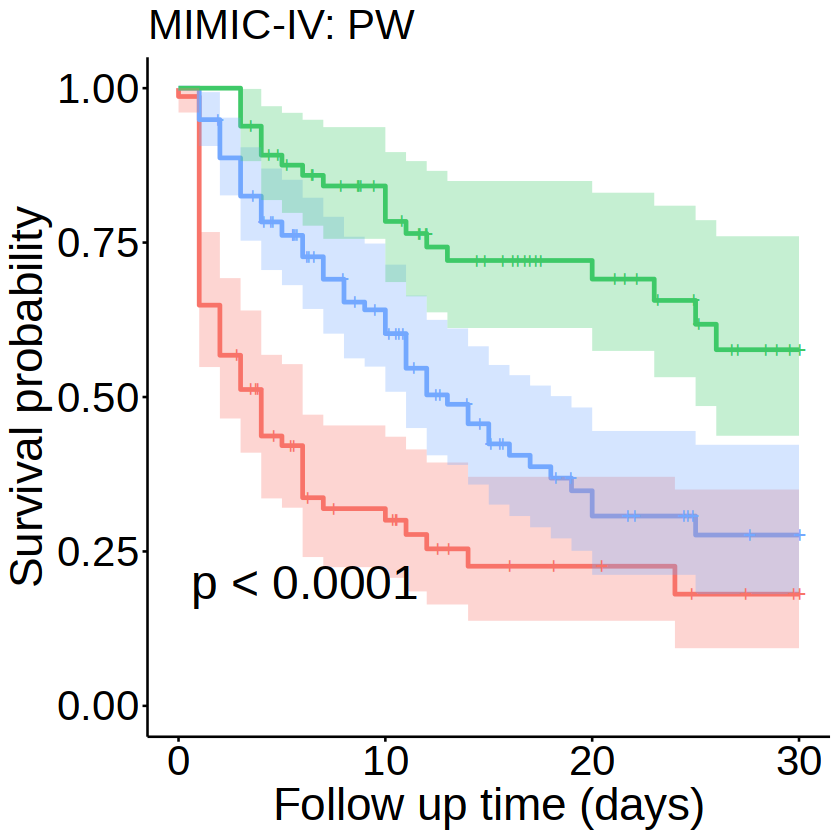

In [14]:
# pdf("MIMIC_C3_28d_mortality.pdf")
# png("MIMIC_C3_28d_mortality.png")

df_select <- df_survival[df_survival$groupHPD==3,]
#df_select = df_select[df_select$group_creteria!="responsive",]

fit <- survfit(Surv(survival_28day,mortality_28d) ~ group_creteria, data = df_select)
ggsurv <- ggsurvplot(fit, data = df_select, 
#                surv.median.line = "hv",  # 增加中位生存时间,
               conf.int = TRUE, # 增加置信区间,
#               risk.table = TRUE, # 绘制累计风险曲线,
               title="MIMIC-IV: PW",
               pval = TRUE,pval.size = 10,
               #add.all = TRUE, # 添加总患者生存曲线,
               xlab = "Follow up time (days)",
               palette = c("#f8746a" ,"#74a8ff","#3fc968"),
               legend = "none",#legend = c(0.8,0.2),legend.title = "",legend.labs = c("No diuretic", "Non-Responsive","Responsive"),# 指定图例位置
                           font.main = 25,     #标题字体大小
               font.x = 27,        #x坐标字体大小
               font.y = 27,        #y坐标字体大小
               font.tickslab = 16,
               risk.table.fontsize = 6,tables.theme = theme_cleantable()+ 
    theme(axis.text.y = element_text(size = 16))) # 指定图例位置
ggsurv$plot <- ggsurv$plot +
  theme(legend.text = element_text(size = 16),axis.text.y = element_text(size = 25), axis.text.x = element_text(size = 25))  # 调整图例文本的字体大小为16
ggsurv$table <- ggsurv$table +
  theme(plot.title = element_text(size = 20, color = "black", face = "bold"))
ggsurv
# dev.off()

In [15]:
pdf("MIMIC_legend_28d_mortality.pdf")

df_select <- df_survival[df_survival$groupHPD==3,]
#df_select = df_select[df_select$group_creteria!="responsive",]

fit <- survfit(Surv(survival_28day,mortality_28d) ~ group_creteria, data = df_select)
ggsurv <- ggsurvplot(fit, data = df_select, 
               surv.median.line = "hv",  # 增加中位生存时间,
               conf.int = TRUE, # 增加置信区间,
#               risk.table = TRUE, # 绘制累计风险曲线,
               title="MIMIC-IV: PW phenotype",
               pval = TRUE,pval.size = 10,
               #add.all = TRUE, # 添加总患者生存曲线,
               xlab = "Follow up time (days)",
               palette = c("#f8746a" ,"#74a8ff","#3fc968"),
               legend.title = "",legend.labs = c("No diuretic", "Non-Responsive","Responsive"),# 指定图例位置
                           font.main = 25,     #标题字体大小
               font.x = 27,        #x坐标字体大小
               font.y = 27,        #y坐标字体大小
               font.tickslab = 16,
               risk.table.fontsize = 6,tables.theme = theme_cleantable()+ 
    theme(axis.text.y = element_text(size = 16))) # 指定图例位置
ggsurv$plot <- ggsurv$plot +
  theme(legend.text = element_text(size = 16),axis.text.y = element_text(size = 25), axis.text.x = element_text(size = 25))  # 调整图例文本的字体大小为16
ggsurv$table <- ggsurv$table +
  theme(plot.title = element_text(size = 20, color = "black", face = "bold"))
ggsurv
# dev.off()